## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Visualization</a></li>
</ul>

# Introduction

This is a dataset on Airline On-Time Statistics and Delay Causes

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.

It includes 1493 entries. 16 domestic carriers. All these entries are in November 2020

Source: https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Data Wrangling

## Gather

In [2]:
df = pd.read_csv('flights.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2020,11,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",29.0,2.0,1.82,0.00,...,0.00,0.0,0.0,69.0,66.0,0.0,3.0,0.0,0.0,NaN
1,2020,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",82.0,1.0,0.85,0.00,...,0.15,0.0,0.0,26.0,22.0,0.0,0.0,0.0,4.0,NaN
2,2020,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",86.0,1.0,0.00,0.22,...,0.00,0.0,0.0,78.0,0.0,17.0,61.0,0.0,0.0,NaN
3,2020,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,8.0,3.01,1.09,...,1.27,0.0,0.0,512.0,298.0,30.0,128.0,0.0,56.0,NaN
4,2020,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",87.0,6.0,2.05,0.48,...,1.55,0.0,0.0,457.0,193.0,35.0,90.0,0.0,139.0,NaN


## Assess

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1493 non-null   int64  
 1    month               1493 non-null   int64  
 2   carrier              1493 non-null   object 
 3   carrier_name         1493 non-null   object 
 4   airport              1493 non-null   object 
 5   airport_name         1493 non-null   object 
 6   arr_flights          1482 non-null   float64
 7   arr_del15            1481 non-null   float64
 8   carrier_ct           1482 non-null   float64
 9    weather_ct          1482 non-null   float64
 10  nas_ct               1482 non-null   float64
 11  security_ct          1482 non-null   float64
 12  late_aircraft_ct     1482 non-null   float64
 13  arr_cancelled        1482 non-null   float64
 14  arr_diverted         1482 non-null   float64
 15   arr_delay           1482 non-null   f

#### Here are the data descriptions for the columns:

- 'airport': 'Airport Code',
- 'airport_name': 'Airport Name',
- 'carrier_name': 'Airline carrier name',
>
- 'arr_cancelled': 'Number of cancelled flights',
- 'arr_diverted': 'Number of flights diverted',
- 'arr_flights': 'Total number of arriving flights in the observation',
- 'carrier': 'Airline carrier abbreviation',
>
- 'arr_del15': 'Total number of delayed flights in the observation',
- 'carrier_ct': 'Number of flights delayed due to air carrier (subset of 'arr_del15)',
- 'late_aircraft_ct': 'Number of flights delayed due to a previous flight using 'the same aircraft being late',
- 'nas_ct': 'Number of flights delayed due to National Aviation System (subset ''of arr_del15)',
- 'security_ct': 'Number of flights delayed due to airport security (subset of 'arr_del15)',
- 'weather_ct': 'Number of flights delayed due to weather (subset of arr_del15)',
>
- 'arr_delay': 'Arrival delay in minutes',
- 'carrier_delay': 'Carrier delay in minutes (subset of arr_delay)',
- 'late_aircraft_delay': 'Aircraft delay in minutes (subset of arr_delay)',
- 'nas_delay': 'National Aviation System in minutes (subset of arr_delay)',
- 'weather_delay': 'Weather delayed in minutes (subset of arr_delay)',
- 'security_delay': 'Security delay in minutes (subset of arr_delay)',
>
- 'year': 'Year (yyyy)'
- 'month': 'Month (mm)',

The Airport variable relates to the Arrival Airport



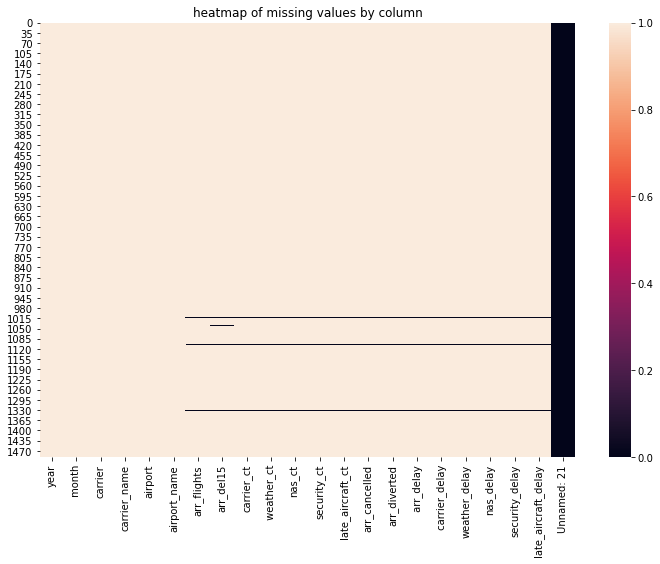

In [4]:
# heatmap of NaNs in the df
plt.figure(figsize = (12,8))
sb.heatmap(df.notna())
plt.title("heatmap of missing values by column")
plt.show()

Very thin black lines indicate that only a few data points are missing

In [5]:
# number of NaNs by colums
# axis=0 means sum vals by column
df.isna().sum(axis = 0)

year                      0
 month                    0
carrier                   0
carrier_name              0
airport                   0
airport_name              0
arr_flights              11
arr_del15                12
carrier_ct               11
 weather_ct              11
nas_ct                   11
security_ct              11
late_aircraft_ct         11
arr_cancelled            11
arr_diverted             11
 arr_delay               11
 carrier_delay           11
weather_delay            11
nas_delay                11
security_delay           11
late_aircraft_delay      11
Unnamed: 21            1493
dtype: int64

In [6]:
df['Unnamed: 21']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1488   NaN
1489   NaN
1490   NaN
1491   NaN
1492   NaN
Name: Unnamed: 21, Length: 1493, dtype: float64

In [7]:
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [8]:
df.sample()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
127,2020,11,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",7826.0,723.0,199.64,10.35,...,172.72,12.0,3.0,51021.0,22780.0,456.0,9497.0,131.0,18157.0,NaN


In [9]:
# check for duplicated rows in the df
df[df.duplicated()]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21


no duplicated rows in the df. Good!

- 'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', and 'late_aircraft_delay' all contain NaNs
- `Unnamed: 21` is mostly NaNs
- `month`, `weather_ct`, `arr_delay`, and `carrier_delay` have spaces in their col lables

- `arr_flights` has a confusing name
- `arr_del15` has a confusing name
- `arr_cancelled` has a confusing name
- `arr_diverted` has a confusing name
- `carrier_ct`, `weather_ct`, `nas_ct`, `security_ct`, and `late_aircraft_ct` all have wrong data type








## Clean

### Define

`Unnamed: 21` is mostly NaNs and should be dropped


### Code

In [10]:
df.drop(axis=1, columns='Unnamed: 21', inplace=True)

### Test

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1493 non-null   int64  
 1    month               1493 non-null   int64  
 2   carrier              1493 non-null   object 
 3   carrier_name         1493 non-null   object 
 4   airport              1493 non-null   object 
 5   airport_name         1493 non-null   object 
 6   arr_flights          1482 non-null   float64
 7   arr_del15            1481 non-null   float64
 8   carrier_ct           1482 non-null   float64
 9    weather_ct          1482 non-null   float64
 10  nas_ct               1482 non-null   float64
 11  security_ct          1482 non-null   float64
 12  late_aircraft_ct     1482 non-null   float64
 13  arr_cancelled        1482 non-null   float64
 14  arr_diverted         1482 non-null   float64
 15   arr_delay           1482 non-null   f

### Define

drop all NaNs in'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', and 'late_aircraft_delay' columns

### Code

In [12]:
df.dropna(how='any', inplace=True)

### Test

In [13]:
# number of NaNs by colums
# axis=0 means sum vals by column
df.isna().sum(axis = 0)

year                   0
 month                 0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
 weather_ct            0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
 arr_delay             0
 carrier_delay         0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

### Define

remove spaces `month`, `weather_ct`, `arr_delay`, and `carrier_delay` column labels


### Code

In [14]:
df.columns = df.columns.str.strip()

### Test

In [15]:
# checking column labels
# all spaces removed
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

### Define

rename 'arr_flights' as `total_arriving_flights`
rename 'arr_del15' as `total_delayed_flights`
rename 'arr_diverted' as `diverted_flights`
rename 'arr_cancelled' as `cancelled_flights`

### Code

In [16]:
df.rename(columns = {"arr_flights": "total_arriving_flights",
                     "arr_del15": "total_delayed_flights",
                     "arr_diverted": "diverted_flights",
                     "arr_cancelled": "cancelled_flights"},inplace = True)

### Test

### Define

drop columns `year` and `month`


### Code

In [17]:
df.drop(axis=1, columns=['year', 'month'], inplace=True)

### Test

In [18]:
# columns dropped successfully
df.columns

Index(['carrier', 'carrier_name', 'airport', 'airport_name',
       'total_arriving_flights', 'total_delayed_flights', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'cancelled_flights', 'diverted_flights', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

# Data Visualization

In [19]:
df.head(3)

,carrier,carrier_name,airport,airport_name,total_arriving_flights,total_delayed_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,cancelled_flights,diverted_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",29.0,2.0,1.82,0.00,0.18,0.0,0.00,0.0,0.0,69.0,66.0,0.0,3.0,0.0,0.0
1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",82.0,1.0,0.85,0.00,0.00,0.0,0.15,0.0,0.0,26.0,22.0,0.0,0.0,0.0,4.0
2,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",86.0,1.0,0.00,0.22,0.78,0.0,0.00,0.0,0.0,78.0,0.0,17.0,61.0,0.0,0.0


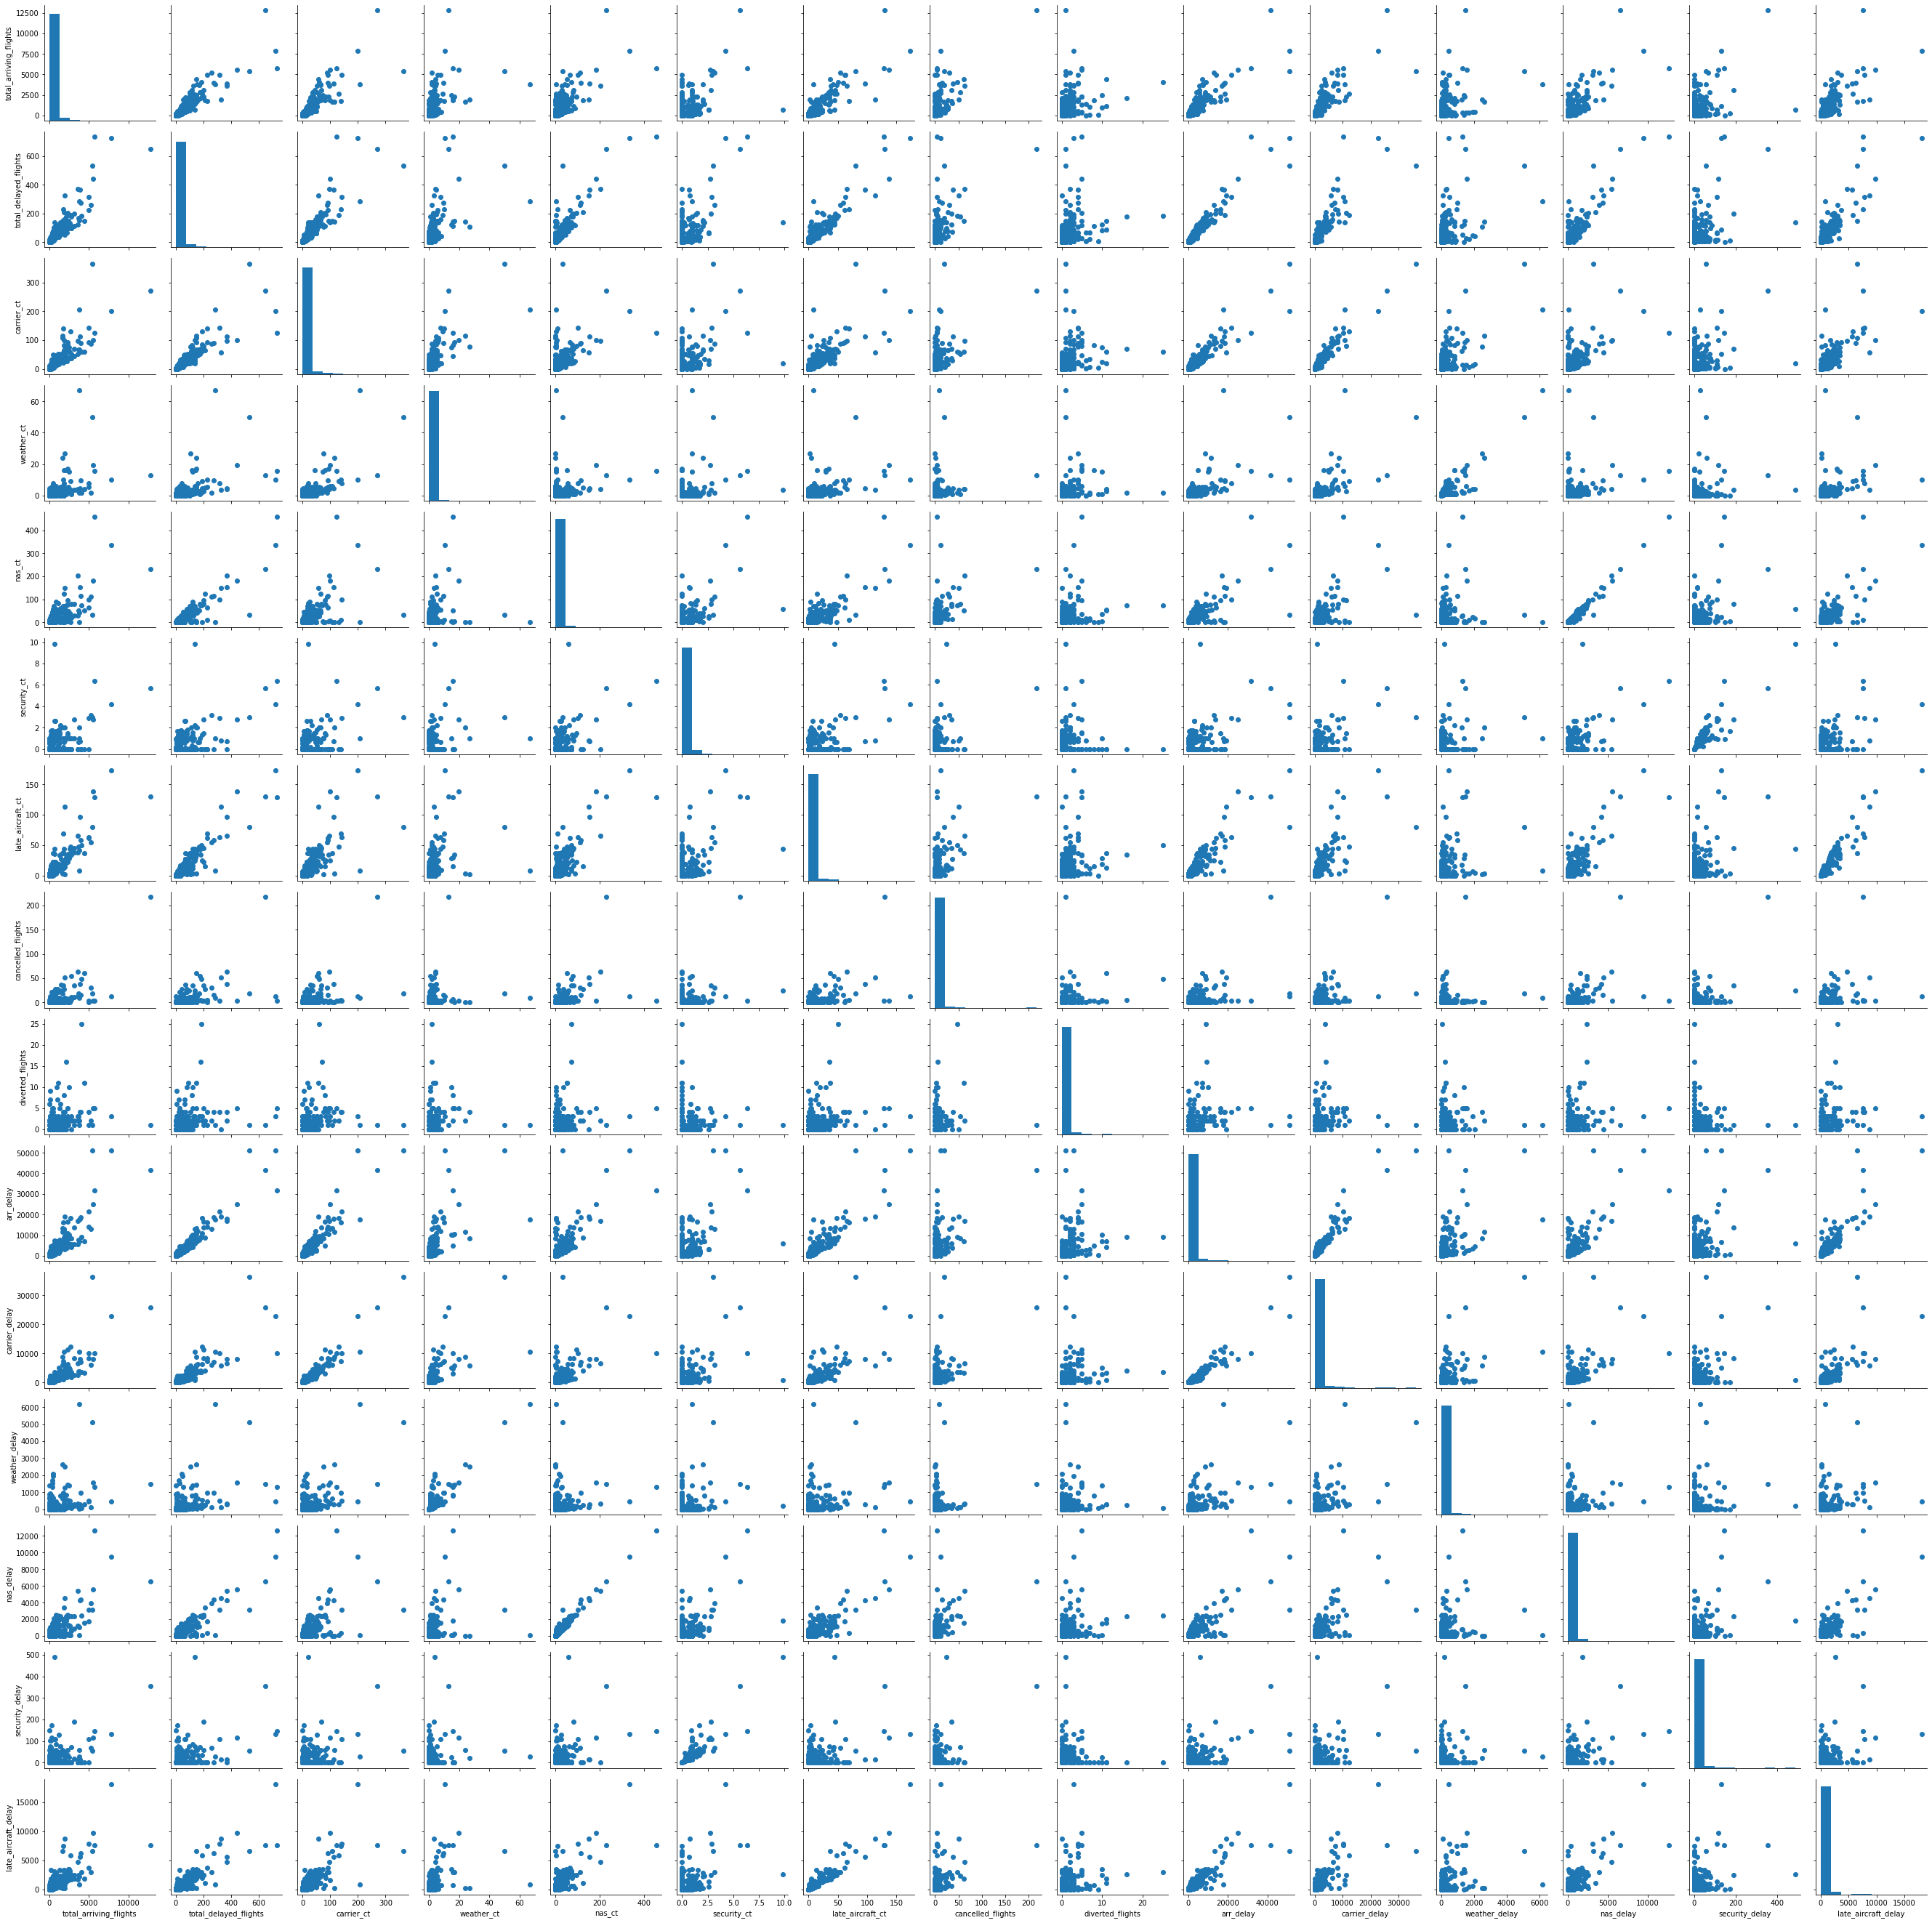

In [20]:
# plot matrix of the entire data set
g = sb.PairGrid(data = df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

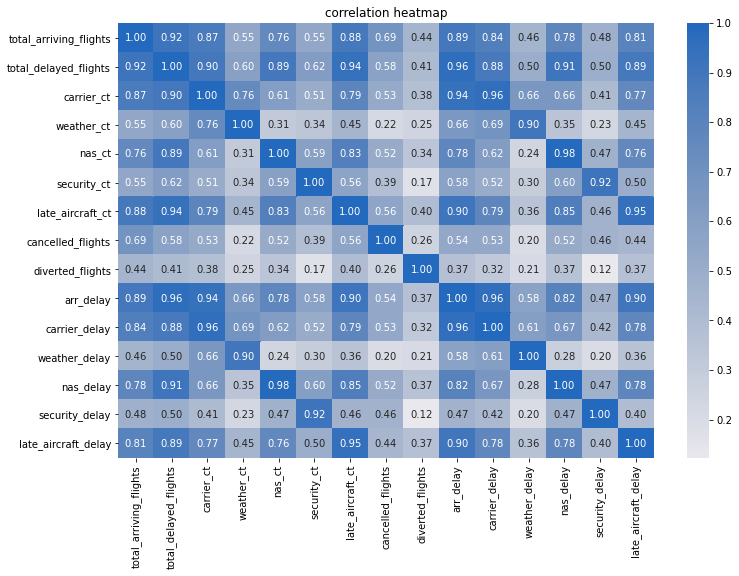

In [21]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title("correlation heatmap");

This heatmap highlights very interesting points that could be analysed even further. some of these points are:

- high correlation between `total delayed flights` and `total arriving flights`. this makes sesne since the more flights there are the higher the chnace of delay
- high correlation between `total delayed flights` and `carrier ct`. This could mean that a carrier could be the main culprit in delaying flights out of all the reasons?
- high correlation between `total delayed flights` and `late aircraft ct`. This could mean that the numner of times an aircraft is late plays a big factor in delaying flights.
- high correlation between `total delayed flights` and `arrival delay` in mins. This is pretty much self explanatory
- weak correlation between `number of diverted flights` and `security_ct`. Also makes sense since delay due to securoty reasons has no link to the the flight being diverted alltogether 
- high correlation between `nas_delay` and `late_aircraft_ct`. I think `nas_delay` causes `late_aircraft_ct` and `late_aircraft_delay`
-`nas_delay` is the cause for `arr_delay` since it is a subset of it
-`nas_delay` is the cause for carrier delay `carrier_delay`?
- high correlation between `late_aircraft_delay` and `carrier_delay`. Is the sircraft late becuase of the carrier being late or is it the other way around?


## General Analysis

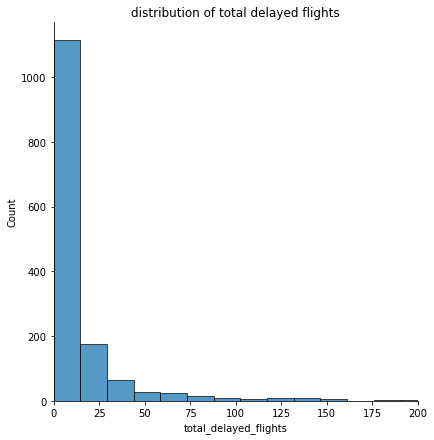

In [22]:
# distribution of total delayed flights
sb.displot(data=df, x='total_delayed_flights', height=6, bins=50)
plt.xlim([0,200])
plt.title("distribution of total delayed flights");

In [23]:
df.total_delayed_flights.mean()

18.50371370695476

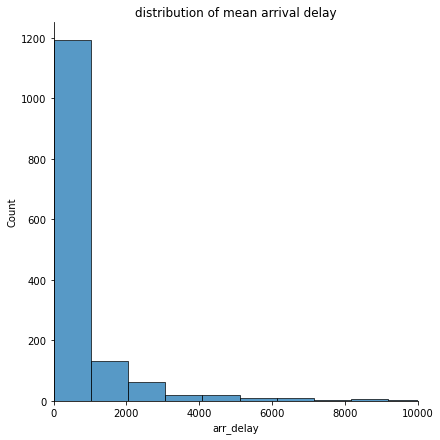

In [24]:
# distribution of mean arrival delay
sb.displot(data=df, x='arr_delay', height=6, bins=50)
plt.xlim([0,10000])
plt.title("distribution of mean arrival delay");

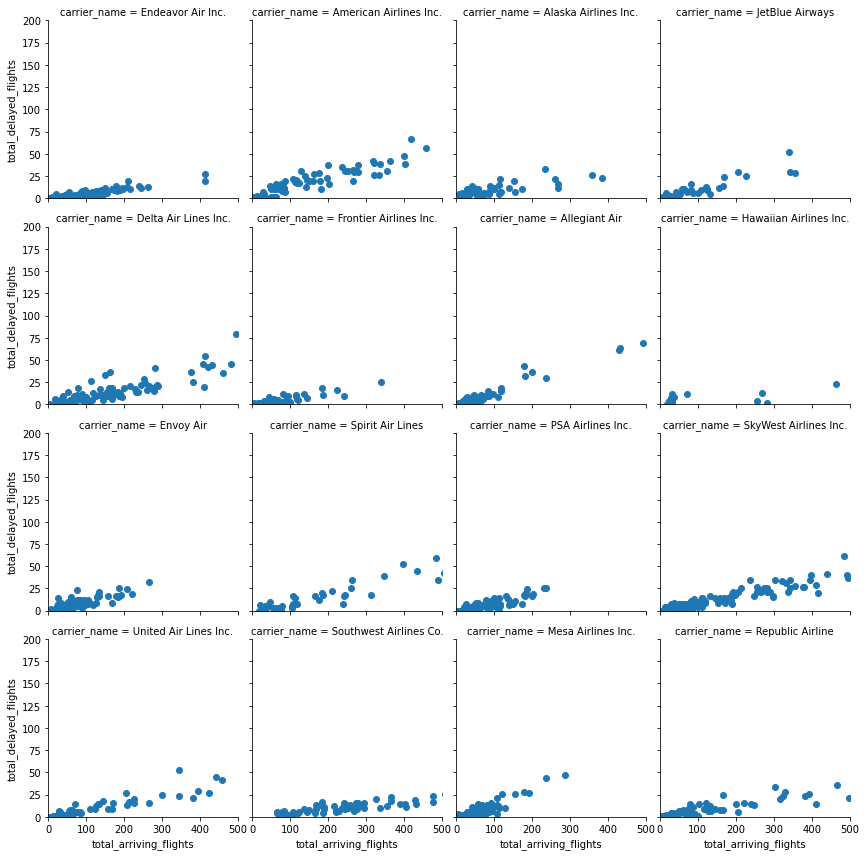

In [25]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'carrier_name', col_wrap=4)
g.map(plt.scatter, 'total_arriving_flights', 'total_delayed_flights', )
plt.xlim([0,500]);
plt.ylim([0,200]);

Seems like a large increase in number of arriving flights cause a slight increase in number of delayed flights

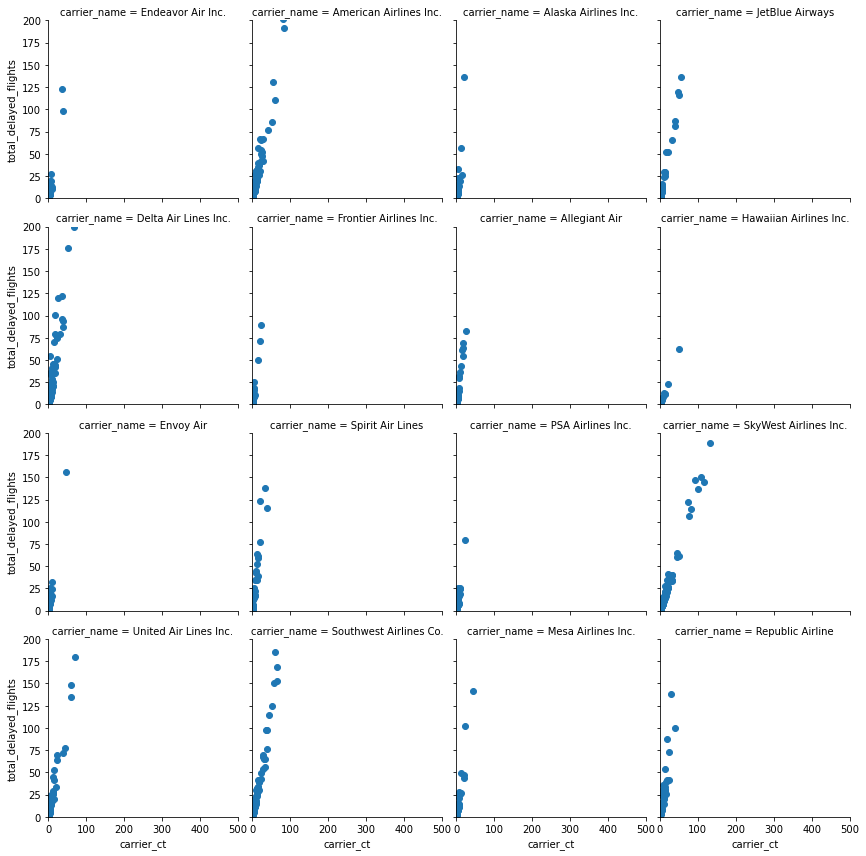

In [26]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'carrier_name', col_wrap=4)
g.map(plt.scatter, 'carrier_ct', 'total_delayed_flights', )
plt.xlim([0,500]);
plt.ylim([0,200]);

slight increase in carrier_ct causes a large increase in number of delayed flights. Makes sense!

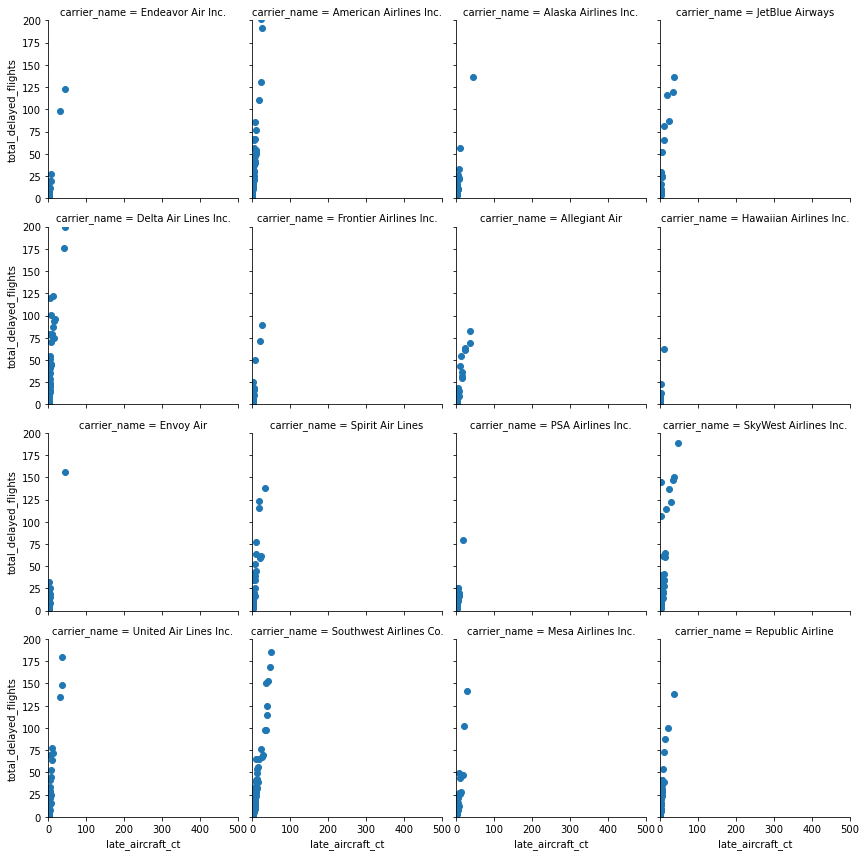

In [27]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'carrier_name', col_wrap=4)
g.map(plt.scatter, 'late_aircraft_ct', 'total_delayed_flights', )
plt.xlim([0,500]);
plt.ylim([0,200]);

Again, a slight increase in late_aricraft_ct causes a large increase in number of delayed flights. Also Makes sense!

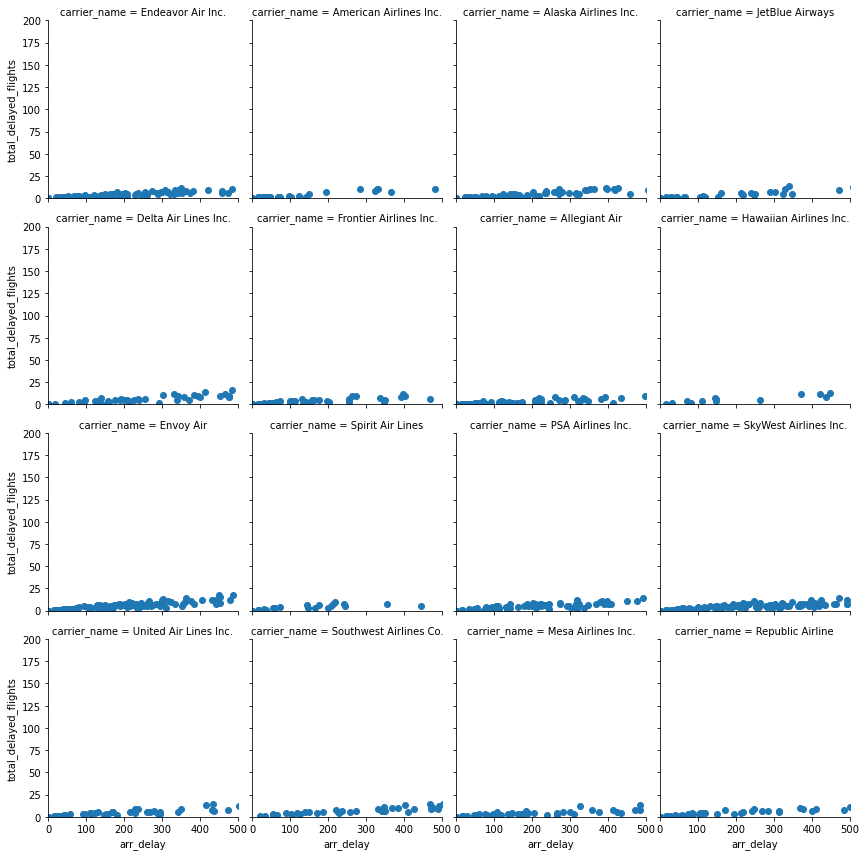

In [28]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'carrier_name', col_wrap=4)
g.map(plt.scatter, 'arr_delay', 'total_delayed_flights', )
plt.xlim([0,500]);
plt.ylim([0,200]);

a slight increase in number of delayed flights causes a large increase in arrival delay time.

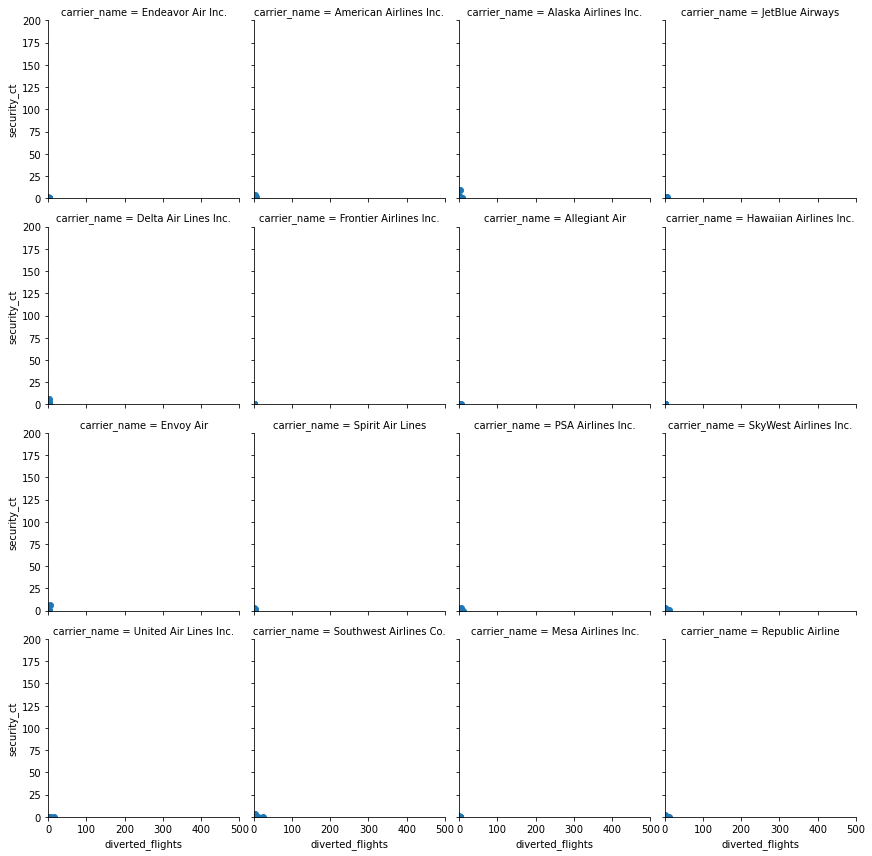

In [29]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'carrier_name', col_wrap=4)
g.map(plt.scatter, 'diverted_flights', 'security_ct', )
plt.xlim([0,500]);
plt.ylim([0,200]);

No relatioship whatsoever between security ct and number of diverted flights. Security ct is the number of flights delayed due to security reasons so it has nothing to do with number of diverted flights!

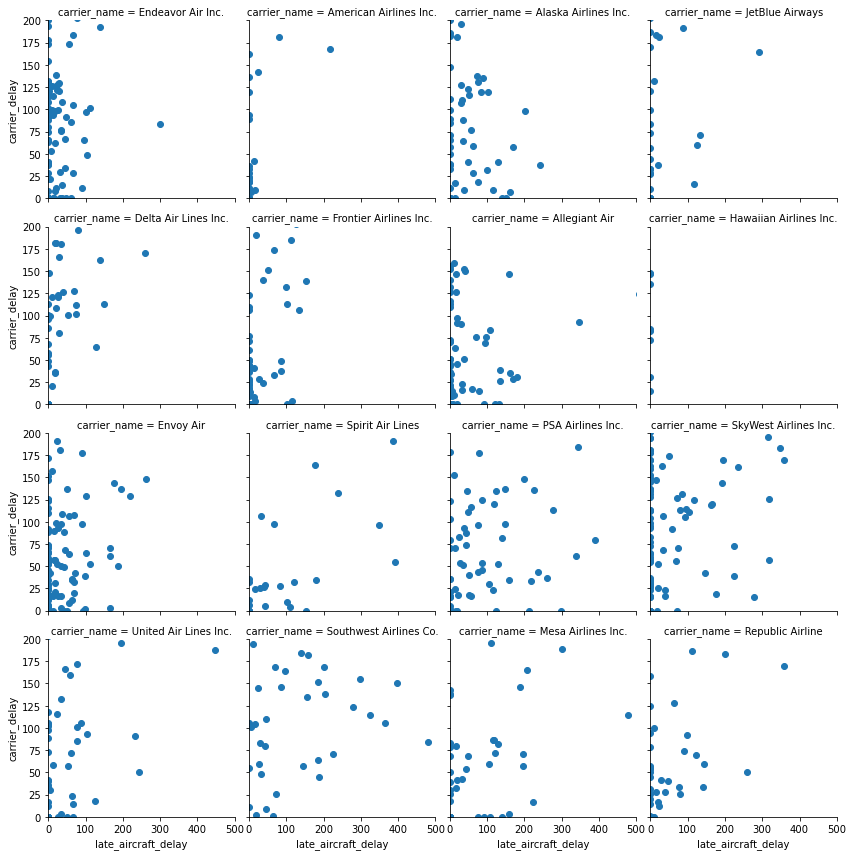

In [30]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'carrier_name', col_wrap=4)
g.map(plt.scatter, 'late_aircraft_delay', 'carrier_delay', )
plt.xlim([0,500])
plt.ylim([0,200]);

There is some sort of pattern here but i dont know how to explain it. The points are concentrated on the y axis for the most part for most carriers.

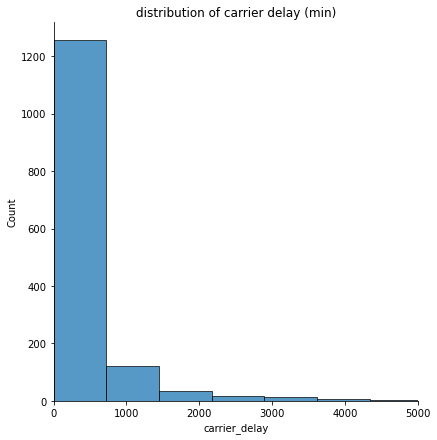

In [31]:
# distribution of carrier delay
sb.displot(data=df, x='carrier_delay', height=6, bins=50)
plt.xlim([0,5000])
plt.title("distribution of carrier delay (min)");

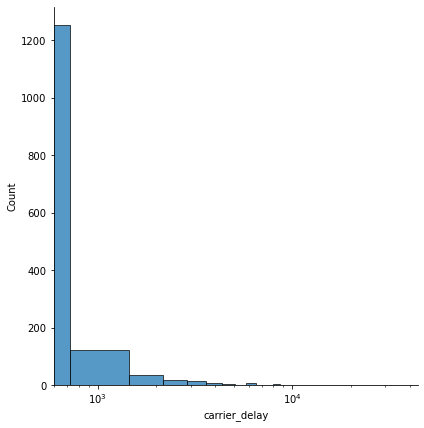

In [32]:
# log transformed distribution of carrier delay
sb.displot(data=df, x='carrier_delay', height=6, bins=50)
# plt.xlim([0,5000])
plt.xscale('log');

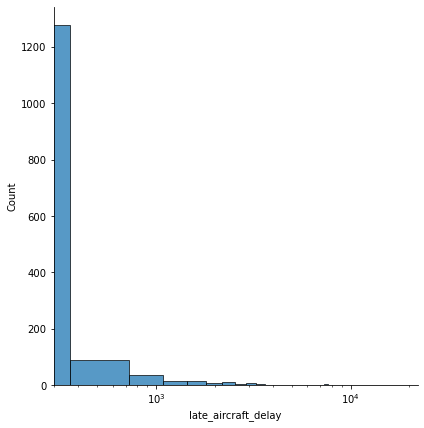

In [33]:
# distribution of late_aircraft_delay
sb.displot(data=df, x='late_aircraft_delay', height=6, bins=50)
# plt.xlim([0,4000])
plt.xscale('log');

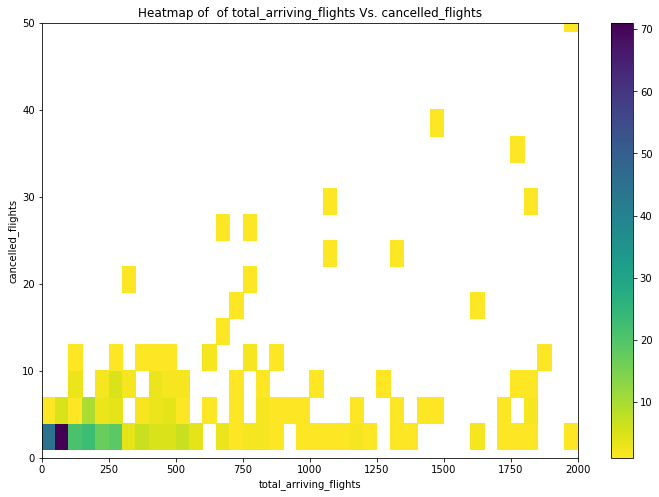

In [34]:
# Specify bin edges 
bins_x = np.arange(1, 12818+50, 50)
bins_y = np.arange(1, 217+3, 3)

plt.figure(figsize=(12,8))
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = df, x = 'total_arriving_flights', y = 'cancelled_flights', cmin=0.5, cmap='viridis_r',bins = [bins_x, bins_y])
plt.xlim([0,2000])
plt.ylim([0,50])
plt.colorbar()
plt.xlabel('total_arriving_flights')
plt.ylabel('cancelled_flights')
plt.title("Heatmap of  of total_arriving_flights Vs. cancelled_flights");

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
try:
    for i in range(counts.shape[0]/2):
        for j in range(counts.shape[1]/2):
            c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')    
except TypeError:
    pass




The darkest points are in the bottom left corner. However maybe a scatter plot could be more informative.

<Figure size 864x576 with 0 Axes>

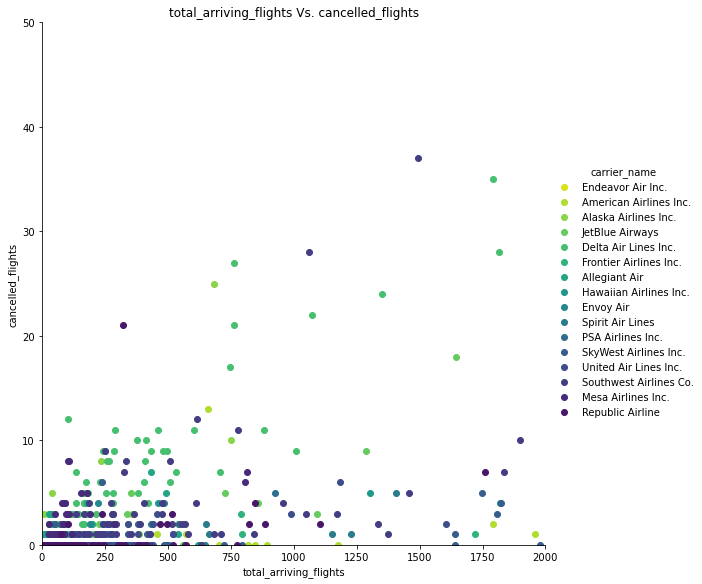

In [35]:
plt.figure(figsize=(12,8))

g = sb.FacetGrid(data = df, height = 8,hue='carrier_name', palette='viridis_r')
g.map(plt.scatter, 'total_arriving_flights', 'cancelled_flights')
# g.set(xscale = 'linear') # need to set scaling before customizing ticks

plt.xlim([0,2000])
plt.ylim([0,50])
plt.title("total_arriving_flights Vs. cancelled_flights");

g.add_legend();

Most carriers are condensed on the bottom left corner with less arriving flights and a few cancelled flights. Some airlines however are up more to the right top corner and have a lot of arriving flights and therefore a higher number of cancelled flights

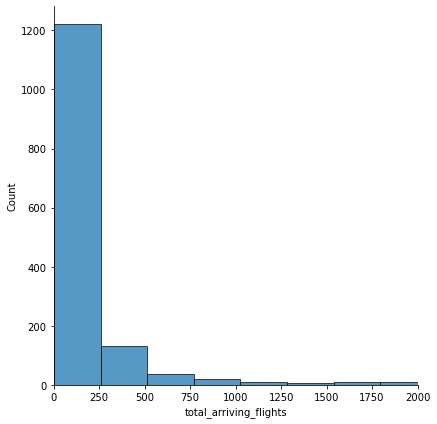

In [36]:
# distribution of total_arriving_flights
sb.displot(data=df, x='total_arriving_flights', height=6, bins=50)
plt.xlim([0,2000]);

In [37]:
# # distribution of total_arriving_flights
# sb.displot(data=df, x='total_arriving_flights', height=6)
# plt.xscale("log")


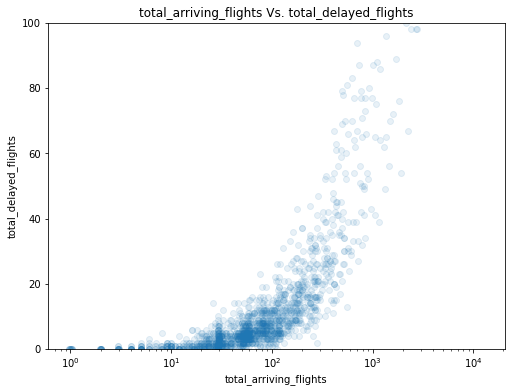

In [38]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT (scatter plot)
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'total_arriving_flights', y = 'total_delayed_flights', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)

plt.xscale('log')
# plt.xlim([0,2000])
plt.ylim([0,100])
plt.xlabel('total_arriving_flights')
plt.ylabel('total_delayed_flights')
plt.title("total_arriving_flights Vs. total_delayed_flights");


There seems to be an some kind of exponnetial relationship between `total_arriving_flights` and `total_delayed_flights`. After 100 total_arriving_flights the total_delayed_flights follow a very explosive increase. More arriving flights means more delayed flights which makes sense!

I hued the same graph with the carrier name. 

<Figure size 864x576 with 0 Axes>

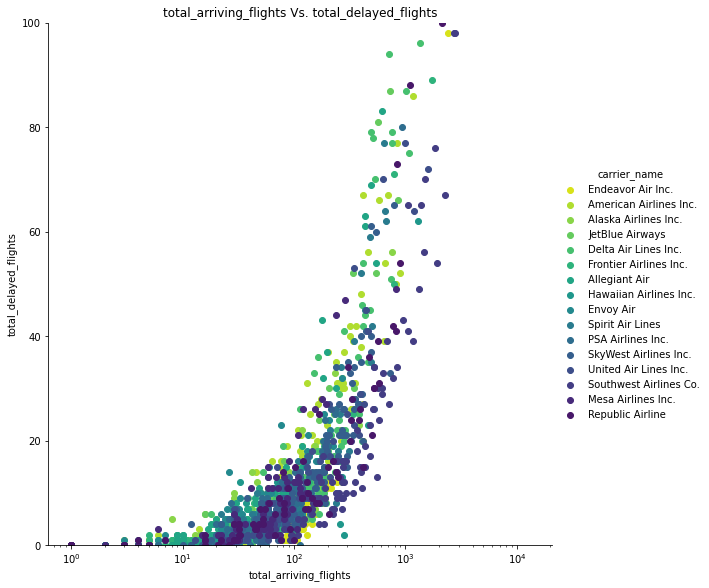

In [39]:
plt.figure(figsize=(12,8))

g = sb.FacetGrid(data = df, height = 8,hue='carrier_name', palette='viridis_r')
g.map(plt.scatter, 'total_arriving_flights', 'total_delayed_flights')
g.set(xscale = 'log') # need to set scaling before customizing ticks

# plt.xlim([0,2000])
plt.ylim([0,100])
plt.title("total_arriving_flights Vs. total_delayed_flights");
g.add_legend();

## Carrier name with the longest delay

In [40]:
# there are 16 carrirts in this data set
df.carrier_name.value_counts()

SkyWest Airlines Inc.     210
Envoy Air                 131
Allegiant Air             120
Endeavor Air Inc.         108
Delta Air Lines Inc.      106
PSA Airlines Inc.          95
Frontier Airlines Inc.     94
Southwest Airlines Co.     91
American Airlines Inc.     91
Mesa Airlines Inc.         87
Republic Airline           81
United Air Lines Inc.      81
Alaska Airlines Inc.       72
JetBlue Airways            53
Spirit Air Lines           46
Hawaiian Airlines Inc.     15
Name: carrier_name, dtype: int64

In [41]:
df_carrier = df.groupby('carrier_name').mean()

In [42]:
df_carrier.arr_delay.describe()

count      16.000000
mean     1017.284337
std       546.557059
min       251.670213
25%       593.100922
50%       922.272882
75%      1279.764418
max      2254.439560
Name: arr_delay, dtype: float64

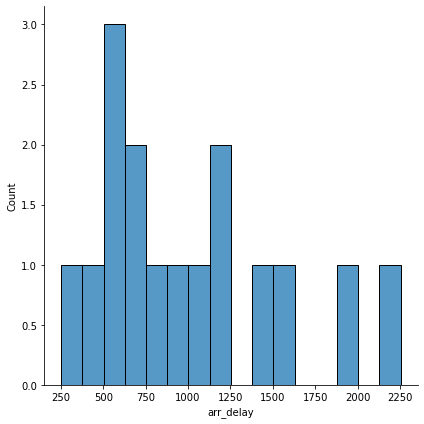

In [43]:
# distribution of mean arrival delay
sb.displot(data=df_carrier, x='arr_delay', height=6, bins=16)

There is a spike in mean arrival delay between 500 and 750 mins and a smaller spike between 1125 and 1250 mins. This is definitely not a normally distributed variable. Is it considered bi-modal since there are 2 spikes?

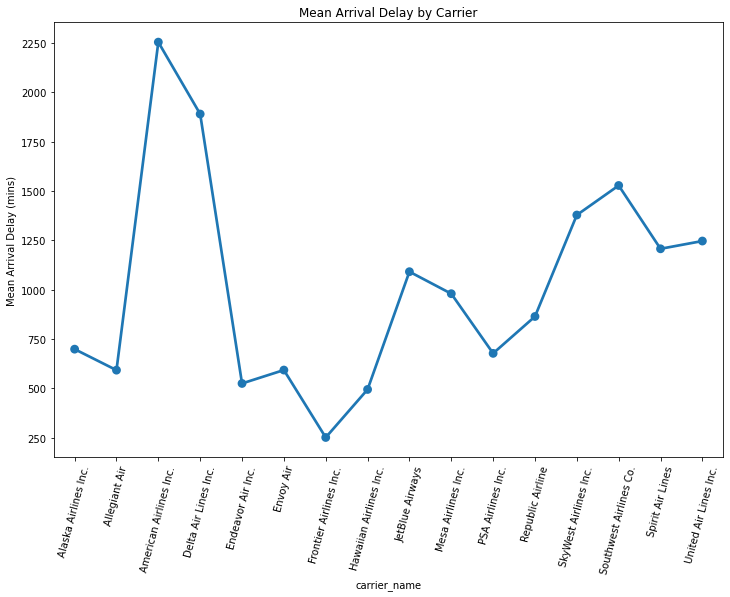

In [44]:
plt.figure(figsize=(12,8))
ax = sb.pointplot(data = df_carrier, x = df_carrier.index, y = 'arr_delay')
plt.xticks(rotation=75)
plt.ylabel("Mean Arrival Delay (mins)")
plt.title("Mean Arrival Delay by Carrier");
plt.show;

This point plot clearly shows that america airlines is the highest in mean arrival delay time while Frontier airlines is the lowest.
However, a barplot could depict the order/ranking between them more clearly

In [45]:
order = list(df_carrier.arr_delay)
order.sort(reverse=True)
order

[2254.4395604395604,
 1890.2358490566037,
 1528.1978021978023,
 1378.5761904761905,
 1246.8271604938273,
 1207.5,
 1091.4716981132076,
 979.9655172413793,
 864.5802469135803,
 699.0833333333334,
 677.7894736842105,
 593.2290076335878,
 592.7166666666667,
 525.3333333333334,
 494.93333333333334,
 251.67021276595744]

In [46]:
# order caarier names in descending order arrival delay to feed into barplot
names = df_carrier.arr_delay.sort_values(ascending=False).index.to_list()
names

['American Airlines Inc.',
 'Delta Air Lines Inc.',
 'Southwest Airlines Co.',
 'SkyWest Airlines Inc.',
 'United Air Lines Inc.',
 'Spirit Air Lines',
 'JetBlue Airways',
 'Mesa Airlines Inc.',
 'Republic Airline',
 'Alaska Airlines Inc.',
 'PSA Airlines Inc.',
 'Envoy Air',
 'Allegiant Air',
 'Endeavor Air Inc.',
 'Hawaiian Airlines Inc.',
 'Frontier Airlines Inc.']

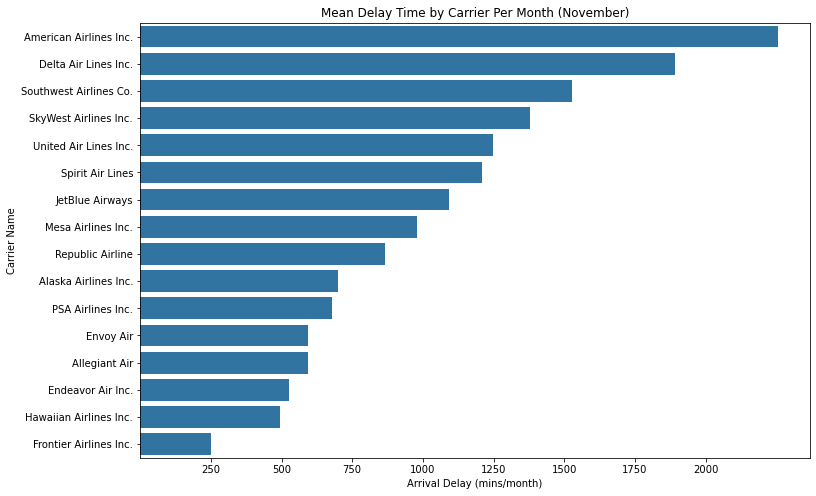

In [47]:
# barpot of mean arr_delay againt carrier names
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[0]

sb.barplot(data = df_carrier, x = 'arr_delay', y = df_carrier.index, order=names, color=base_color)

plt.title('Mean Delay Time by Carrier Per Month (November)')
plt.xlabel('Arrival Delay (mins/month)')
plt.ylabel('Carrier Name')
plt.xticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000]);

This plot shows clearly shows the order of mean delay time per month (November in this dataset) by carrier name.
Top 3 most delayed airlines are:
- 'American Airlines Inc.'(highest)
- 'Delta Air Lines Inc.',
- 'Southwest Airlines Co.

least 3 delayed airlines are:
- 'Endeavor Air Inc.',
- 'Hawaiian Airlines Inc.',
- 'Frontier Airlines Inc. (lowest)


## Why is America Airlines the highest in mean arrival delay time?

In [48]:
df_carrier.sort_values(by='arr_delay', ascending=False).head()

,total_arriving_flights,total_delayed_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,cancelled_flights,diverted_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier_name,,,,,,,,,,,,,,,
American Airlines Inc.,422.857143,38.769231,16.579341,0.675934,15.300769,0.363846,5.849890,0.494505,0.472527,2254.439560,1180.285714,67.593407,441.637363,13.747253,551.175824
Delta Air Lines Inc.,464.858491,37.283019,12.903679,0.603019,18.388679,0.190472,5.196604,7.971698,0.358491,1890.235849,961.330189,52.773585,549.216981,11.915094,315.000000
Southwest Airlines Co.,771.846154,32.000000,13.633407,0.568132,8.233297,0.140549,9.425165,4.989011,1.043956,1528.197802,739.010989,32.879121,255.483516,5.285714,495.538462
SkyWest Airlines Inc.,242.957143,19.676190,13.909524,2.104762,0.371429,0.066667,3.223810,0.395238,0.504762,1378.576190,872.414286,185.738095,29.700000,1.852381,288.871429
United Air Lines Inc.,298.246914,21.172840,8.592346,0.753210,7.958765,0.000000,3.868889,0.703704,0.641975,1246.827160,521.555556,132.753086,242.456790,0.000000,350.061728


In [49]:
def drawPieAA(num1, num2):
    cols = list(df_carrier.columns[num1:num2]) # get the col labels and put them in a list
    numbers = list(df_carrier.loc['American Airlines Inc.', cols].squeeze()) #get the vals in the cols and put them in a list
    plt.figure(figsize=(12,8))
#     colors = ['#89CFF0','#89CFF0','#89CFF0','#89CFF0','#89CFF0'] # add colors
    plt.pie(numbers,labels=cols,autopct='%1.1f%%', startangle=90, counterclock = False)
    plt.title("American Airlines Inc. delay by cause")
    plt.axis('equal')
    plt.show();

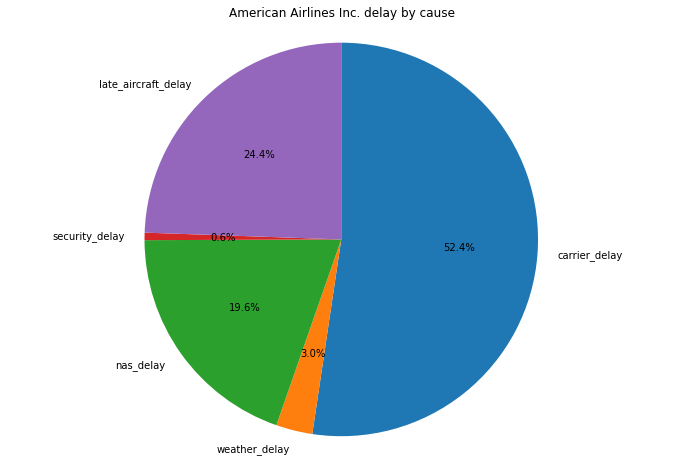

In [50]:
drawPieAA(10,15)

It is clear now that AA is highest in mean delay due to the carrier itself since 52.4% of its total delays in November 2020 is is due to carrier delay. Bad management maybe?

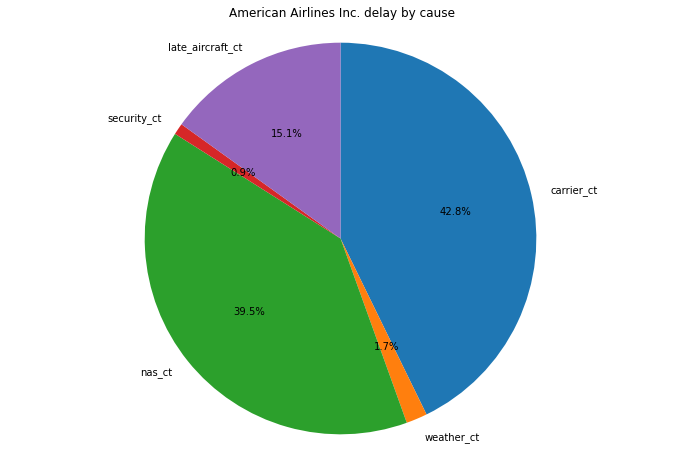

In [51]:
drawPieAA(2,7)

This pie chart also shows that not only is American Ailines highest in mean dealy time but the number of times its flights were delayed is mostly also because of them! 

## What variable plays the biggest part in arrival delay?

In [52]:
df_carrier.sort_values(by='arr_delay', ascending=False).head()

,total_arriving_flights,total_delayed_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,cancelled_flights,diverted_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier_name,,,,,,,,,,,,,,,
American Airlines Inc.,422.857143,38.769231,16.579341,0.675934,15.300769,0.363846,5.849890,0.494505,0.472527,2254.439560,1180.285714,67.593407,441.637363,13.747253,551.175824
Delta Air Lines Inc.,464.858491,37.283019,12.903679,0.603019,18.388679,0.190472,5.196604,7.971698,0.358491,1890.235849,961.330189,52.773585,549.216981,11.915094,315.000000
Southwest Airlines Co.,771.846154,32.000000,13.633407,0.568132,8.233297,0.140549,9.425165,4.989011,1.043956,1528.197802,739.010989,32.879121,255.483516,5.285714,495.538462
SkyWest Airlines Inc.,242.957143,19.676190,13.909524,2.104762,0.371429,0.066667,3.223810,0.395238,0.504762,1378.576190,872.414286,185.738095,29.700000,1.852381,288.871429
United Air Lines Inc.,298.246914,21.172840,8.592346,0.753210,7.958765,0.000000,3.868889,0.703704,0.641975,1246.827160,521.555556,132.753086,242.456790,0.000000,350.061728


In [53]:
def drawPieDelay():
    labels = list(df_carrier.columns[11:]) # get the labels in a list
    samp = df_carrier.sample() # take a random sample from the df
    numbers = list(df_carrier.loc[samp.index, labels].squeeze())
    plt.figure(figsize=(12,8))
    plt.pie(numbers,labels=labels,autopct='%1.1f%%', startangle=90, counterclock = False)
    plt.title(f"{samp.index[0]}'s' delay by cause")
    plt.axis('equal')
    plt.show();


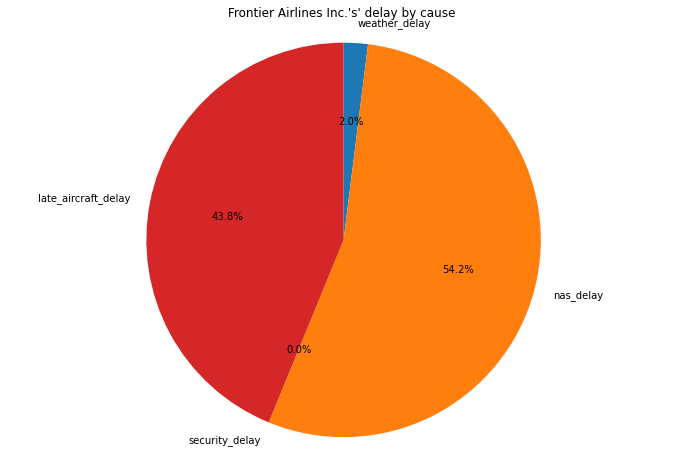

In [54]:
drawPieDelay()

>I call the func `drawPieDelay()` multiple times to try and get a feel as to which variables play the largest part in arrival delay in general

Seems like `nas_delya`, `carrier_delay` and `late_aircraft_delay` are the biggest 3 factors in arrival delay. I need to know which one plays the most part though. I will make a bar chart that compares them all

In [55]:
labels = list(df_carrier.columns[10:]) # get col labels in a list called labels
labels

['carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

In [56]:
# create a list of sums of delay columns 
heights = []
for label in labels:
    heights.append(df_carrier[label].sum())

heights

[7780.409668451724,
 791.0701603398293,
 3473.614643179154,
 70.41970649172163,
 4161.035207220144]

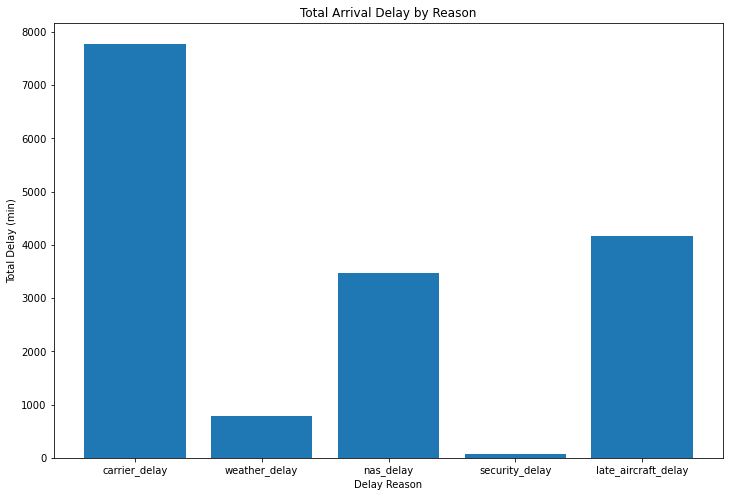

In [57]:
plt.figure(figsize=(12,8))
plt.bar([1,2,3,4, 5],heights, tick_label = labels)
plt.title('Total Arrival Delay by Reason')
plt.xlabel('Delay Reason')
plt.ylabel('Total Delay (min)');

It is pretty clear now that carrier delay is the main culprit in arrival delay followed by late aircrafts

## What airline has the highest number of delayed flights?


In [58]:
df_delayed = df.groupby('carrier_name').sum()

In [59]:
df_delayed.head()

,total_arriving_flights,total_delayed_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,cancelled_flights,diverted_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier_name,,,,,,,,,,,,,,,
Alaska Airlines Inc.,10766.0,1071.0,327.32,31.56,441.55,14.66,255.90,124.0,37.0,50334.0,20998.0,1955.0,12608.0,609.0,14164.0
Allegiant Air,6935.0,846.0,301.98,35.88,200.34,4.83,303.01,57.0,19.0,71126.0,36741.0,2989.0,8390.0,230.0,22776.0
American Airlines Inc.,38480.0,3528.0,1508.72,61.51,1392.37,33.11,532.34,45.0,43.0,205154.0,107406.0,6151.0,40189.0,1251.0,50157.0
Delta Air Lines Inc.,49275.0,3952.0,1367.79,63.92,1949.20,20.19,550.84,845.0,38.0,200365.0,101901.0,5594.0,58217.0,1263.0,33390.0
Endeavor Air Inc.,21081.0,1013.0,412.98,34.61,360.24,1.00,204.17,2.0,21.0,56736.0,27980.0,2551.0,14354.0,50.0,11801.0


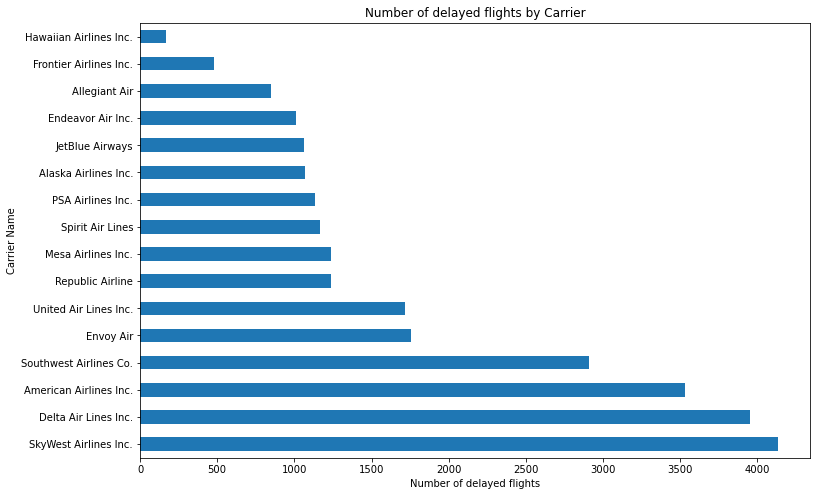

In [60]:
plt.figure(figsize=(12,8))
df_delayed.total_delayed_flights.sort_values(ascending=False).plot(kind='barh')
plt.title('Number of delayed flights by Carrier')
plt.xlabel('Number of delayed flights')
plt.ylabel('Carrier Name');

This is a pretty informative chart. However, we need to construct a ratio of delayed flights to arriving flights in order to be more accurate.

## Which airline is the most efficient (has least delays)?


In [61]:
df_airline = df.groupby('carrier_name').sum()

In [63]:
# make a copy of the index as a column since i need the carrier name to hue on
df_airline['airline'] = df_airline.index

<Figure size 864x576 with 0 Axes>

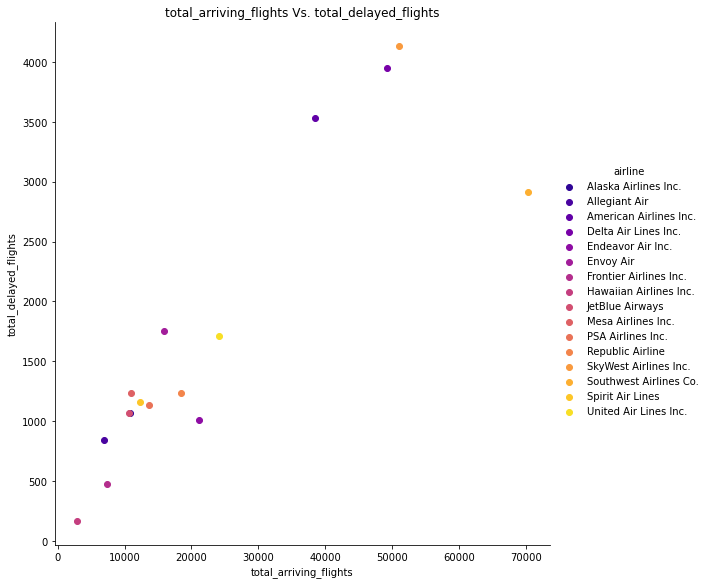

In [64]:
plt.figure(figsize=(12,8))

g = sb.FacetGrid(data = df_airline, height = 8, hue='airline', palette='plasma')
g.map(plt.scatter, 'total_arriving_flights', 'total_delayed_flights')
# g.set(xscale = 'log') # need to set scaling before customizing ticks

# plt.xlim([0,2000])
# plt.ylim([0,100])
plt.title("total_arriving_flights Vs. total_delayed_flights");
g.add_legend();

This scatter plot shows that 4 carriers are high up on total delayed flights and arriving flights while the rest are on the lower left corner. This is not enough. Let us use feature engineering to create ratio of delayed flights over total arriving flights and use that to acctually figure out what airlines are most and what airlines are least efficient.

>Rather than comparing total_delayed_flights it is more accurate to get a ratio of the delayed flights to the total arriving flights hence why i created the column `del_arr`. This is a good application of feature engineering!

In [65]:
# calc del_arr column
# lower is better
df_airline['del_arr'] = df_airline.total_delayed_flights/df_airline.total_arriving_flights * 100

In [66]:
df_airline.del_arr.describe()

count    16.000000
mean      8.266553
std       2.351427
min       4.145904
25%       6.631442
50%       8.189161
75%       9.926225
max      12.198991
Name: del_arr, dtype: float64

In [67]:
df_airline.head()

,total_arriving_flights,total_delayed_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,cancelled_flights,diverted_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,airline,del_arr
carrier_name,,,,,,,,,,,,,,,,,
Alaska Airlines Inc.,10766.0,1071.0,327.32,31.56,441.55,14.66,255.90,124.0,37.0,50334.0,20998.0,1955.0,12608.0,609.0,14164.0,Alaska Airlines Inc.,9.947984
Allegiant Air,6935.0,846.0,301.98,35.88,200.34,4.83,303.01,57.0,19.0,71126.0,36741.0,2989.0,8390.0,230.0,22776.0,Allegiant Air,12.198991
American Airlines Inc.,38480.0,3528.0,1508.72,61.51,1392.37,33.11,532.34,45.0,43.0,205154.0,107406.0,6151.0,40189.0,1251.0,50157.0,American Airlines Inc.,9.168399
Delta Air Lines Inc.,49275.0,3952.0,1367.79,63.92,1949.20,20.19,550.84,845.0,38.0,200365.0,101901.0,5594.0,58217.0,1263.0,33390.0,Delta Air Lines Inc.,8.020294
Endeavor Air Inc.,21081.0,1013.0,412.98,34.61,360.24,1.00,204.17,2.0,21.0,56736.0,27980.0,2551.0,14354.0,50.0,11801.0,Endeavor Air Inc.,4.805275


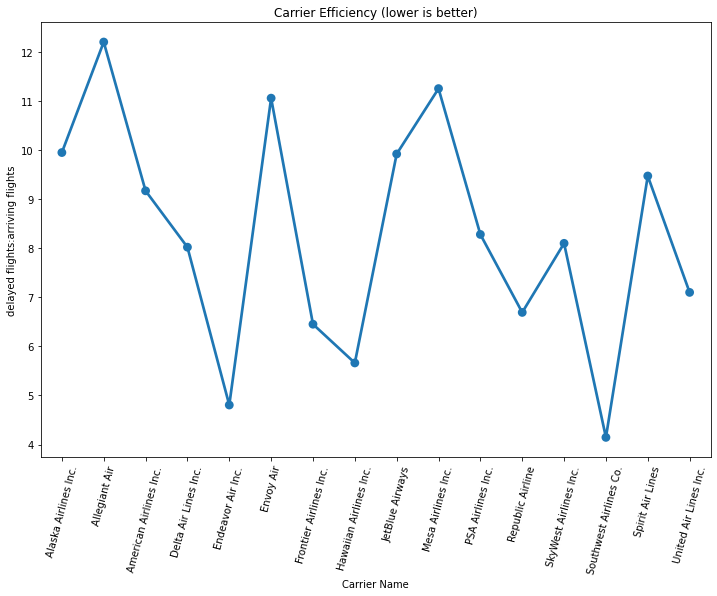

In [68]:
plt.figure(figsize=(12,8))
ax = sb.pointplot(data = df_airline, x = 'airline', y = 'del_arr')
plt.xticks(rotation=75)
plt.xlabel("Carrier Name")
plt.ylabel("delayed flights:arriving flights")
plt.title("Carrier Efficiency (lower is better)");
plt.show;

we can clearly see that `Southwest Airlines Co.` is the most efficient with the least delayed flights followed by `Endeavor Air Inc.` and `Hawaiian Airlines Inc.` and then `Frontier Airlines Inc.`

In [69]:
# another way of checking to make sure the line plot is correct
# sort col del_arr in ascending order
df_airline.sort_values(by='del_arr')['del_arr']

carrier_name
Southwest Airlines Co.     4.145904
Endeavor Air Inc.          4.805275
Hawaiian Airlines Inc.     5.662320
Frontier Airlines Inc.     6.451178
Republic Airline           6.691530
United Air Lines Inc.      7.099098
Delta Air Lines Inc.       8.020294
SkyWest Airlines Inc.      8.098626
PSA Airlines Inc.          8.279696
American Airlines Inc.     9.168399
Spirit Air Lines           9.470344
JetBlue Airways            9.918972
Alaska Airlines Inc.       9.947984
Envoy Air                 11.055783
Mesa Airlines Inc.        11.250454
Allegiant Air             12.198991
Name: del_arr, dtype: float64

>as expected the results match the line plot

